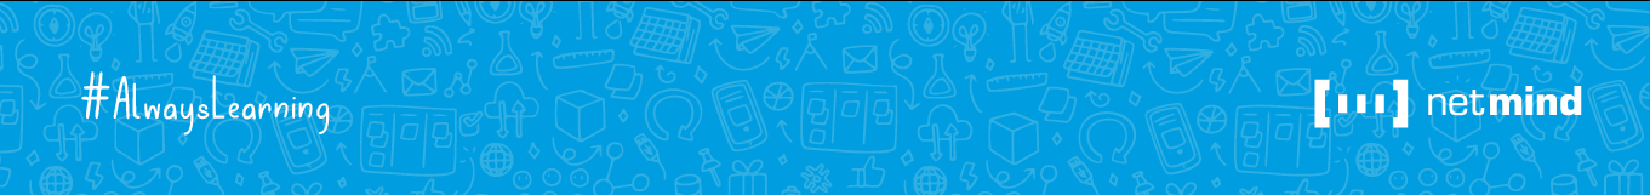
# **Uso de PySpark con Azure ML y Databricks en Azure**

Databricks es una plataforma unificada de análisis de datos y machine learning que se ejecuta sobre Apache Spark. Proporciona una interfaz visual para gestionar clústeres Spark, notebooks colaborativos y pipelines de datos. Al integrar Databricks con Azure ML, puedes aprovechar las capacidades de procesamiento distribuido de Spark para entrenar modelos de machine learning a gran escala.

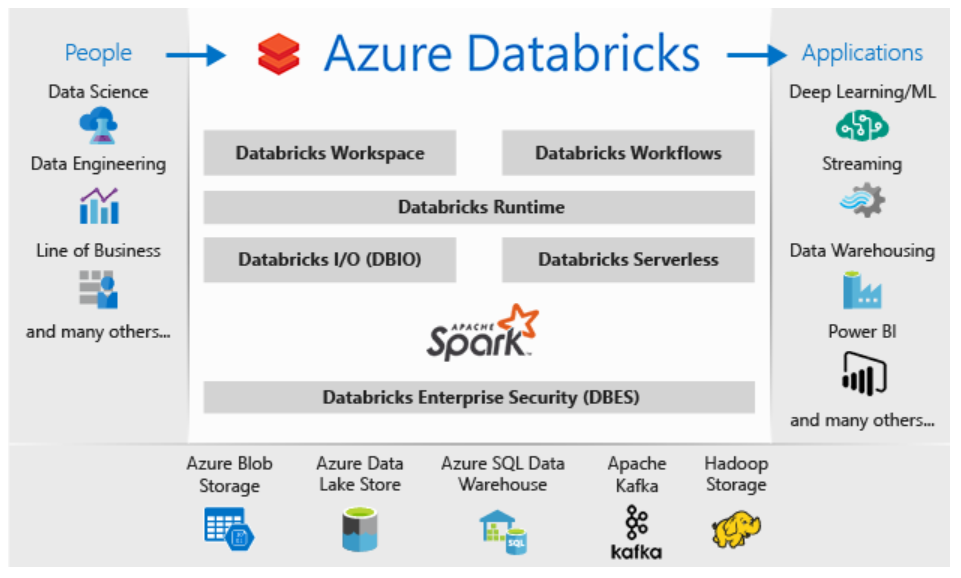

https://www.sqlshack.com/a-beginners-guide-to-azure-databricks/

## **Configuración de Databricks en Azure**

1. **Crear un Workspace de Databricks:**
   - Ve a Azure Portal.
   - Crea un nuevo recurso de tipo **Azure Databricks**.
   - Configura un workspace de Databricks y un clúster Spark.

2. **Instalar Dependencias en Databricks:**
   - Usa el clúster Spark de Databricks para instalar bibliotecas como `azure.ai.ml` y otras dependencias necesarias.

3. **Conectar Databricks con Azure ML:**
   - En Azure ML, vincula el workspace de Databricks como un destino de computación.

#### **Ejemplo: Vincular Databricks con Azure ML**

In [ ]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

# Configurar cliente de Azure ML
ml_client = MLClient.from_config(credential=DefaultAzureCredential())

# Vincular el workspace de Databricks
databricks_compute = ml_client.compute.attach(
    name="my-databricks-compute",
    resource_id="/subscriptions/<subscription-id>/resourceGroups/<resource-group>/providers/Microsoft.Databricks/workspaces/<workspace-name>"
)

print(f"Databricks vinculado como destino de computación: {databricks_compute.name}")

## **Ejecutar Trabajos PySpark en Databricks desde Azure ML**

### **1. Script PySpark**


In [ ]:
%%writefile script.py

from pyspark.sql import SparkSession

# Crear una sesión Spark
spark = SparkSession.builder \
    .appName("Azure ML + Databricks Job") \
    .getOrCreate()

# Leer datos desde un archivo CSV
df = spark.read.csv("dbfs:/FileStore/data.csv", header=True, inferSchema=True)

# Realizar transformaciones
df_filtered = df.filter(df["Sales"] > 1000)
df_grouped = df_filtered.groupBy("Region").sum("Sales")

# Guardar resultados
df_grouped.write.csv("dbfs:/FileStore/output", header=True)

# Detener la sesión Spark
spark.stop()

### **2. Configurar y Enviar el Job**

In [ ]:
from azure.ai.ml.entities import CommandJob, Environment
from azure.ai.ml import Input

# Definir el entorno
environment = Environment(
    image="mcr.microsoft.com/azureml/openmpi3.1.2-ubuntu18.04:latest",
    conda_file="conda.yml"  # Archivo YAML con dependencias
)

# Definir el job
job = CommandJob(
    code="./src",  # Carpeta que contiene el script
    command="python script.py",
    environment=environment,
    compute="my-databricks-compute",  # Nombre del clúster Databricks
    inputs={
        "data": Input(type="uri_folder", path="azureml://datastores/my_datastore/paths/data.csv"),
    },
)

# Enviar el job
returned_job = ml_client.jobs.create_or_update(job)
print(f"Job enviado: {returned_job.name}")

### **Más Información**
- [Integración de Databricks con Azure ML](https://learn.microsoft.com/en-us/azure/databricks/integrations/azure-machine-learning/)
- [Guía de Uso de Databricks en Azure](https://learn.microsoft.com/en-us/azure/databricks/scenarios/what-is-azure-databricks)
- [Ejemplos de Trabajos PySpark en Databricks](https://docs.databricks.com/getting-started/examples.html)



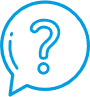
## **¿Preguntas?**
